# Handling Imbalanced Dataset with Machine Learning

Context-
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content-
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration-
Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
import pandas as pd
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

In [3]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
#Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

### Cross Validation Like KFOLD and Hyperpaqrameter Tuning

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [6]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [7]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [9]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

C:\Users\Monica\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [10]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85242    45]
 [   54   102]]
0.9988413328183702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85287
           1       0.69      0.65      0.67       156

    accuracy                           1.00     85443
   macro avg       0.85      0.83      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [11]:
347*100

34700

In [12]:
y_train.value_counts()

0    199028
1       336
Name: Class, dtype: int64

In [13]:
class_weight=dict({0:1,1:100})

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [15]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85281     6]
 [   48   108]]
0.9993679997191109
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85287
           1       0.95      0.69      0.80       156

    accuracy                           1.00     85443
   macro avg       0.97      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### Under Sampling

In [16]:
from collections import Counter
Counter(y_train)

Counter({0: 199028, 1: 336})

In [17]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

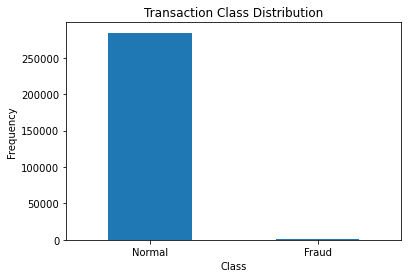

In [20]:
import matplotlib.pyplot as plt

LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [22]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [23]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [25]:
!pip install imblearn

In [26]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print(X_train_ns.shape,y_train_ns.shape)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\Monica\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


(756, 30) (756,)
The number of classes before fit Counter({0: 199028, 1: 336})
The number of classes after fit Counter({0: 420, 1: 336})


In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [28]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[63179 22108]
 [    8   148]]
0.7411607738492328
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     85287
           1       0.01      0.95      0.01       156

    accuracy                           0.74     85443
   macro avg       0.50      0.84      0.43     85443
weighted avg       1.00      0.74      0.85     85443



### Over Sampling

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
df.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

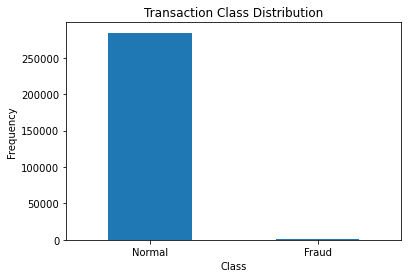

In [31]:
import matplotlib.pyplot as plt

LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [32]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [33]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [34]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print(X_train_ns.shape,y_train_ns.shape)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\Monica\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


(348299, 30) (348299,)
The number of classes before fit Counter({0: 199028, 1: 336})
The number of classes after fit Counter({0: 199028, 1: 149271})


In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [36]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85278     9]
 [   43   113]]
0.9993914071369217
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85287
           1       0.93      0.72      0.81       156

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### SMOTETomek

In [37]:
from imblearn.combine import SMOTETomek

In [38]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\Monica\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199028, 1: 336})
The number of classes after fit Counter({0: 198158, 1: 148401})


In [39]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [40]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85272    15]
 [   36   120]]
0.999403110845827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85287
           1       0.89      0.77      0.82       156

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



### Ensemble Techniques

In [41]:
from imblearn.ensemble import EasyEnsembleClassifier

In [43]:
easy=EasyEnsembleClassifier()
easy.fit(X_train,y_train)

EasyEnsembleClassifier()

In [45]:
y_pred=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[82619  2668]
 [   10   146]]
0.9686574675514671
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85287
           1       0.05      0.94      0.10       156

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

